#Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты


# Задание

1. Загрузите файл HR.csv в pandas dataframe

2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

3. Рассчитайте и визуализируйте корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

4. Рассчитайте сколько сотрудников работает в каждом
департаменте.

5. Показать распределение сотрудников по зарплатам.

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

 ● Доля сотрудников с повышением за последние 5 лет

 ● Средняя степень удовлетворенности

 ● Среднее количество проектов

9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

10. Загрузить jupyter notebook с решение на github и прислать ссылку

1. Загрузите файл HR.csv в pandas dataframe


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import plotly.express as px
import scipy.stats as stats

In [29]:
df = pd.read_csv('/content/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).


In [30]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [31]:
# рассчёт моды
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# для переменной average_montly_hours значение моды отражают 2 одинаоко наиболее часто встречаемые значения '135' и '156'.
# среднее этих значений и будет являться для нас модой.
df['average_montly_hours'].mode().mean()

145.5

3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

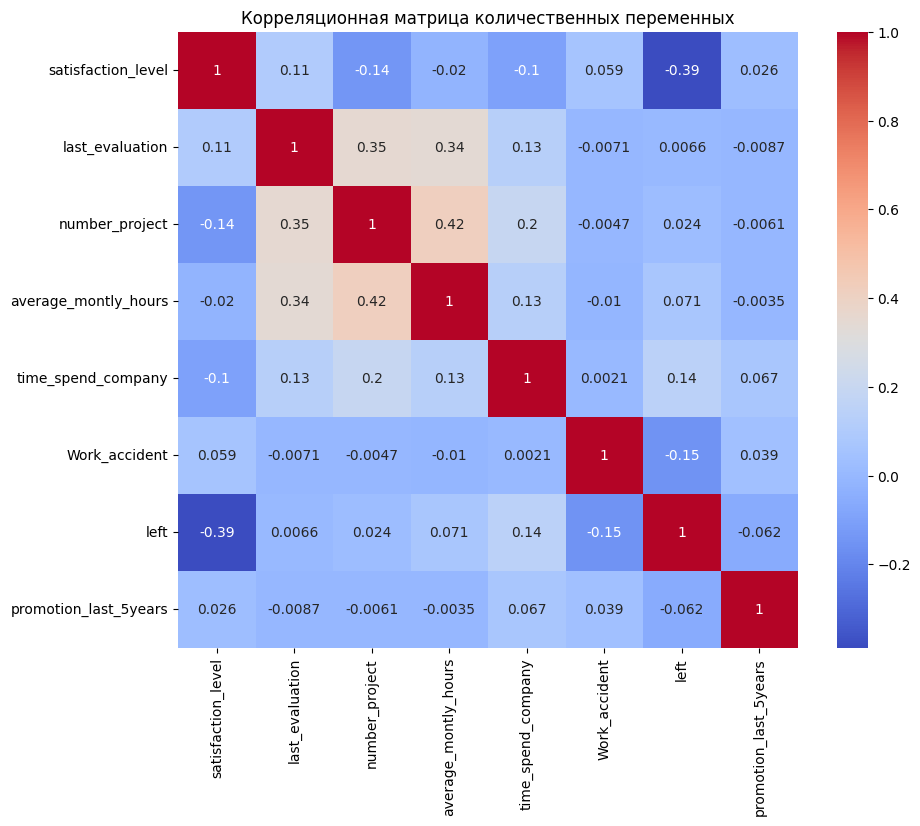

Две самые скоррелированные переменные:
number_project        average_montly_hours    0.417211
average_montly_hours  number_project          0.417211
dtype: float64

Две наименее скоррелированные переменные:
left                satisfaction_level   -0.388375
satisfaction_level  left                 -0.388375
dtype: float64


In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица количественных переменных')
plt.show()

# Определение двух самых скоррелированных и двух наименее скоррелированных переменных
corr_pairs = df.corr(numeric_only=True).unstack().sort_values(ascending=False)
most_correlated = corr_pairs[(corr_pairs < 1) & (corr_pairs != 1)].head(2)
least_correlated = corr_pairs[(corr_pairs < 1) & (corr_pairs != 1)].tail(2)

print('Две самые скоррелированные переменные:')
print(most_correlated)
print('\nДве наименее скоррелированные переменные:')
print(least_correlated)

4. Рассчитайте сколько сотрудников работает в каждом
департаменте.


In [34]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

5. Показать распределение сотрудников по зарплатам.


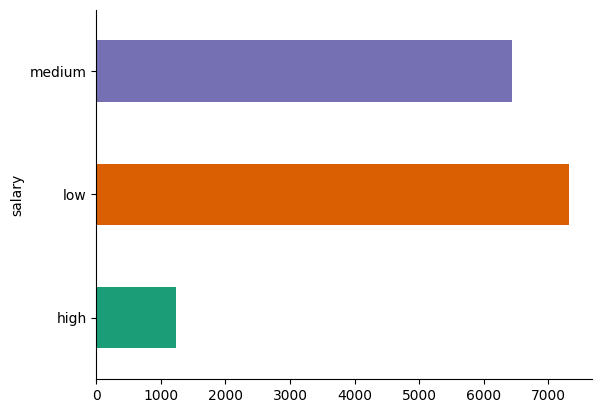

In [35]:
df.groupby('salary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности


<Axes: xlabel='department'>

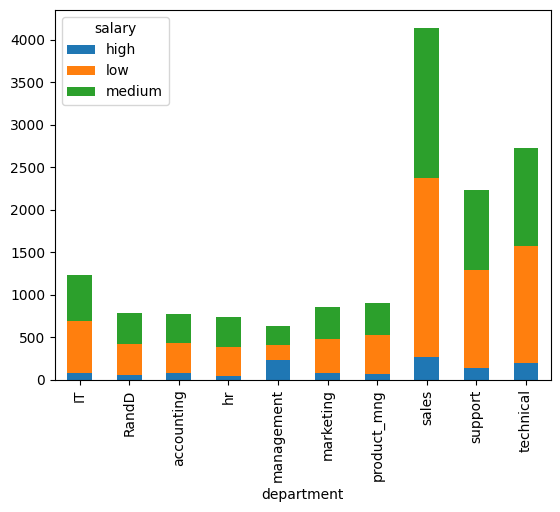

In [36]:
df.groupby(['department', 'salary']).size().unstack().plot(kind='bar', stacked=True)


7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом


In [37]:
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']

#H0 - сотрудники обоих категорий проводят равное количество времени на работе.
#H1 - сотрудники обоих категорий проводят разное количество времени на работе.

# Проведение t-теста Стьюдента
t_stat, p_value = stats.ttest_ind(high_salary_hours, low_salary_hours)

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу - существует статистически значимая разница")
else:
    print("Принимаем нулевую гипотезу - статистически значимой разницы нет")

Принимаем нулевую гипотезу - статистически значимой разницы нет


8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

 ● Доля сотрудников с повышением за последние 5 лет

 ● Средняя степень удовлетворенности

 ● Среднее количество проектов


Уволившиеся:
Доля сотрудников с повышением за последние 5 лет: 0.005320638476617194
Средняя степень удовлетворенности: 0.4400980117614114
Среднее количество проектов: 3.8555026603192384

Не уволившиеся:
Доля сотрудников с повышением за последние 5 лет: 0.026251312565628283
Средняя степень удовлетворенности: 0.666809590479524
Среднее количество проектов: 3.786664333216661


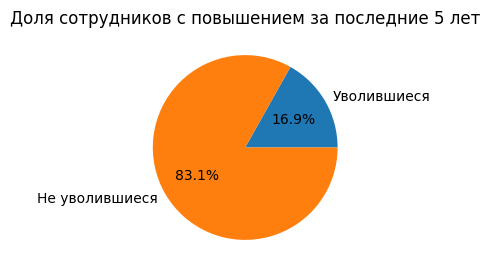

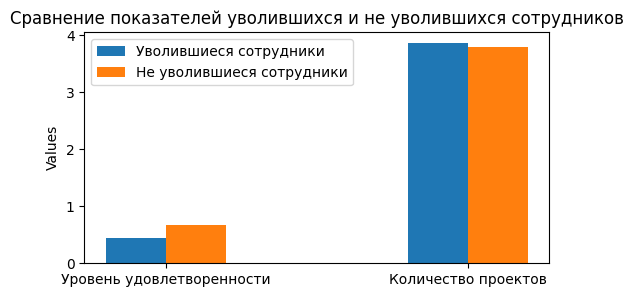

In [38]:
# Расчет указанных показателей среди уволившихся сотрудников
left_df = df[df['left'] == 1]
left_promotion_rate = left_df['promotion_last_5years'].mean()
left_satisfaction_mean = left_df['satisfaction_level'].mean()
left_projects_mean = left_df['number_project'].mean()

# Расчет указанных показателей среди не уволившихся сотрудников
not_left_df = df[df['left'] == 0]
not_left_promotion_rate = not_left_df['promotion_last_5years'].mean()
not_left_satisfaction_mean = not_left_df['satisfaction_level'].mean()
not_left_projects_mean = not_left_df['number_project'].mean()

# Вывод результатов
print("Уволившиеся:")
print("Доля сотрудников с повышением за последние 5 лет:", left_promotion_rate)
print("Средняя степень удовлетворенности:", left_satisfaction_mean)
print("Среднее количество проектов:", left_projects_mean)

print("\nНе уволившиеся:")
print("Доля сотрудников с повышением за последние 5 лет:", not_left_promotion_rate)
print("Средняя степень удовлетворенности:", not_left_satisfaction_mean)
print("Среднее количество проектов:", not_left_projects_mean)

# Создание графиков
plt.figure(figsize=(3, 3))
plt.pie([left_promotion_rate, not_left_promotion_rate], labels=['Уволившиеся', 'Не уволившиеся'], autopct='%1.1f%%')
plt.title('Доля сотрудников с повышением за последние 5 лет')
plt.show()

labels = ['Уровень удовлетворенности', 'Количество проектов']
left_values = [left_satisfaction_mean, left_projects_mean]
not_left_values = [not_left_satisfaction_mean, not_left_projects_mean]

x = range(len(labels))

plt.figure(figsize=(6, 3))
plt.bar(x, left_values, width=0.2, label='Уволившиеся сотрудники')
plt.bar([i+0.2 for i in x], not_left_values, width=0.2, label='Не уволившиеся сотрудники')
plt.xticks([i+0.1 for i in x], labels)
plt.ylabel('Values')
plt.title('Сравнение показателей уволившихся и не уволившихся сотрудников')
plt.legend()
plt.show()

9.
* Разделить данные на тестовую и обучающую выборки
* Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
* Оценить качество модели на тестовой выборки
10. Загрузить jupyter notebook с решением на github и прислать ссылку

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [40]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop(['left', 'department', 'salary'], axis=1)  # исключаем 'department' и 'salary'
y = df['left']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Построение и обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lda.predict(X_test)




In [41]:
# Оценка качества модели на тестовой выборке
accuracy = accuracy_score(y_test, y_pred)

print(f'Точность модели на тестовой выборке: {accuracy}')

Точность модели на тестовой выборке: 0.7536
